# Decision Tree

Decision Tree의 분류방법

1. 하나의 독립변수 $x_i$를 선택해 그 독립변수에 대한 기준값(threshlod)를 정하여 최적의 분류 규칙을 찾는다.


2. 부모노드를 위에서 정의한 분류 규칙에 따라 하위노드로 나눈다.


3. (1, 2)번 과정을 하위 노드에서 반복하여 Pure한 상태가 될 때까지 노드를 나눈다.

# 분류규칙

다음과 같은 노드가 있다고 가정할 때 IG는 다음과 같이 계산할 수 있다.

(기준 A)

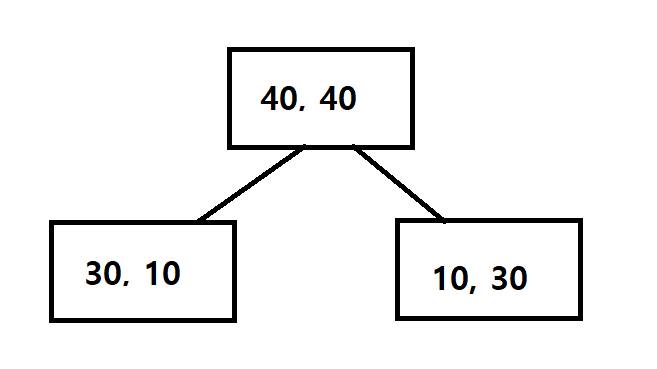

분류규칙을 정하는 방법은 부모노드와 자식노드 간의 엔트로피를 가장 낮게 만드는 최상의 독립변수와 기준값을 차즌것.

이를 수치적으로 정량화 한 값이 정보획득값(Information Gain)이다.

$$IG = H[Y] - H[Y|X]$$

$$H[Y] = -\dfrac{1}{2}\log_2\left(\dfrac{1}{2}\right) -\dfrac{1}{2}\log_2\left(\dfrac{1}{2}\right) = \dfrac{1}{2} + \dfrac{1}{2}  = 1m$$

In [18]:
import math

Hy = -1/2 * math.log(1/2,2) -1/2 * math.log(1/2,2)
Hy

$$H[Y|X=X_1] = -\dfrac{3}{4}\log_2\left(\dfrac{3}{4}\right) -\dfrac{1}{4}\log_2\left(\dfrac{1}{4}\right) = 0.81$$

In [19]:
Hx_1 = -3/4 * math.log(3/4,2) -1/4 * math.log(1/4,2)
Hx_1

0.8112781244591328

$$H[Y|X=X_2] = -\dfrac{1}{4}\log_2\left(\dfrac{1}{4}\right)  -\dfrac{3}{4}\log_2\left(\dfrac{3}{4}\right) = 0.81$$

In [20]:
Hx_2 = -1/4 * math.log(1/4,2) -3/4 * math.log(3/4,2)
Hx_2

0.8112781244591328

$$H[Y|X] = \dfrac{1}{2} H[Y|X=X_1] + \dfrac{1}{2} H[Y|X=X_2] = 0.81$$

In [22]:
# 가중평균

Hx = 1/2 * Hx_1 + 1/2 * Hx_2
Hx

0.8112781244591328

In [23]:
IG = Hy - Hx
IG

0.18872187554086717

# sklearn - Decision Tree

In [28]:
# IRIS 데이터 로드

from sklearn.datasets import load_iris

data = load_iris()
X = data.data[:, 2:]
y = data.target

feature_names = data.feature_names[2:]

# Decision Tree 분류기 이용
from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0).fit(X, y)

In [87]:
# 트리모형 분류 결과 시각화 함수 작성

import pydotplus
from IPython.core.display import Image
from sklearn.tree import export_graphviz
import os

os.environ['PATH'] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

def draw_decision_tree(model):

    dot_data = export_graphviz(model, out_file=None,
                          feature_names=feature_names,
                          class_names=data.target_names,
                          impurity=False,
                          filled=True)
    
    graph = pydotplus.graph_from_dot_data(dot_data) # Draw graph
    image = graph.create_png()
    return Image(image)


def plot_decision_regions(X, y, model, title):
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors)

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = model.predict(
        np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)

    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
                    c=[cmap(idx)], marker=markers[idx], s=80, label=cl)

    plt.xlabel(data.feature_names[2])
    plt.ylabel(data.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)

    return Z

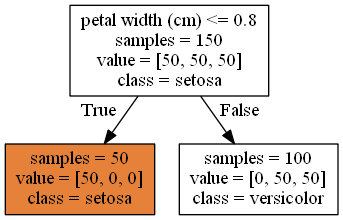

In [88]:
draw_decision_tree(tree1)

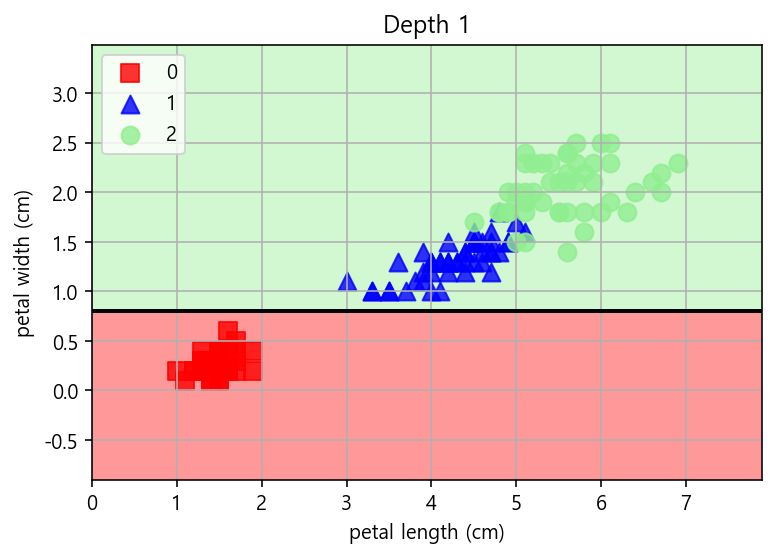

In [89]:
# 순수하게 분류된 것을 확인

plot_decision_regions(X, y, tree1, "Depth 1")
plt.grid()
plt.show()

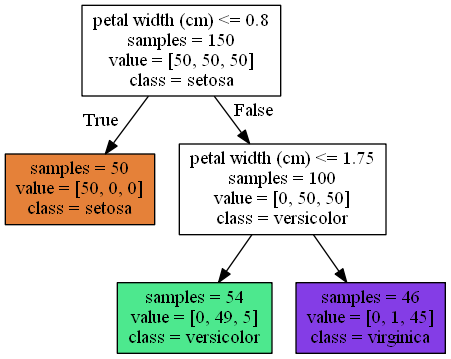

In [96]:
# depth를 2로 지정

tree2 = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0).fit(X, y)

draw_decision_tree(tree2)

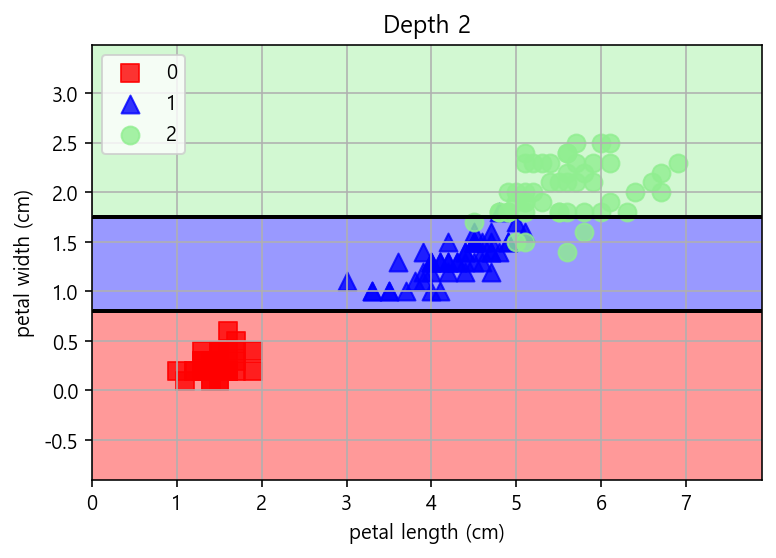

In [95]:
plot_decision_regions(X, y, tree2, "Depth 2")
plt.grid()
plt.show()

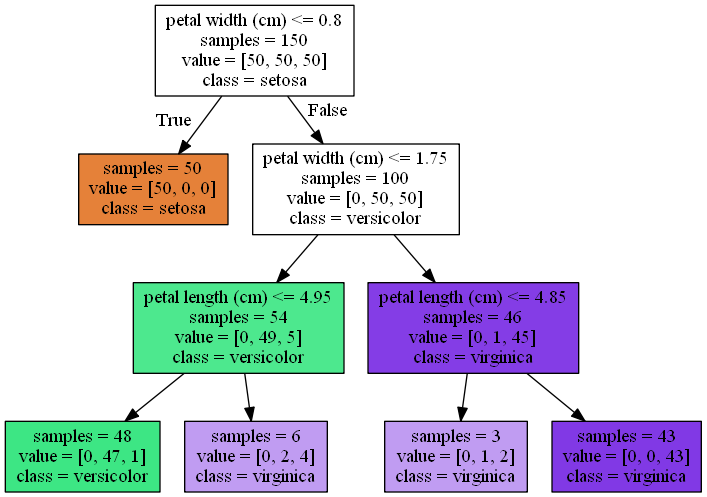

In [98]:
# depth를 3로 지정

tree3 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0).fit(X, y)

draw_decision_tree(tree3)

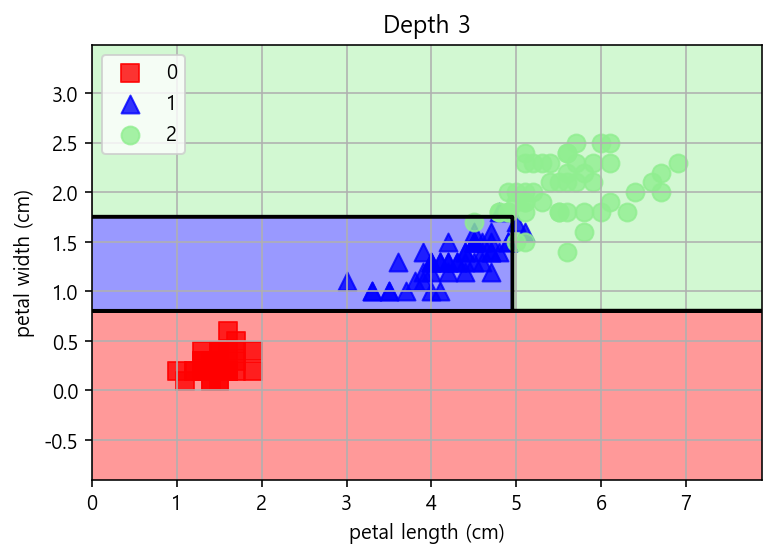

In [99]:
plot_decision_regions(X, y, tree3, "Depth 3")
plt.grid()
plt.show()

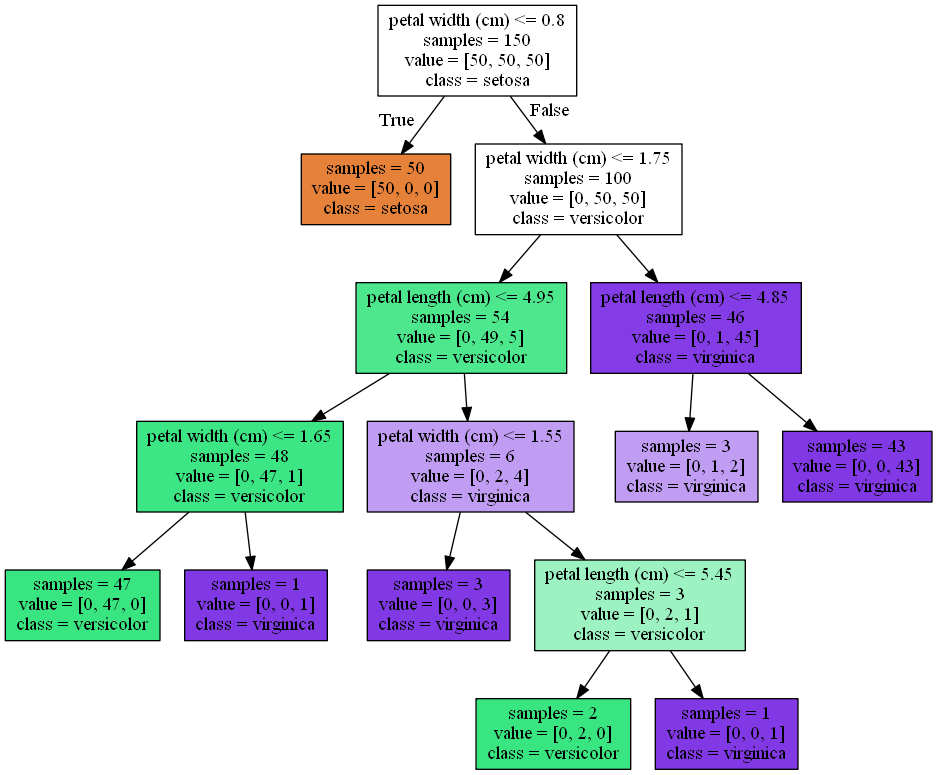

In [100]:
# depth를 지정하지 않은 경우

tree4 = DecisionTreeClassifier(criterion='entropy', random_state=0).fit(X, y)

draw_decision_tree(tree4)

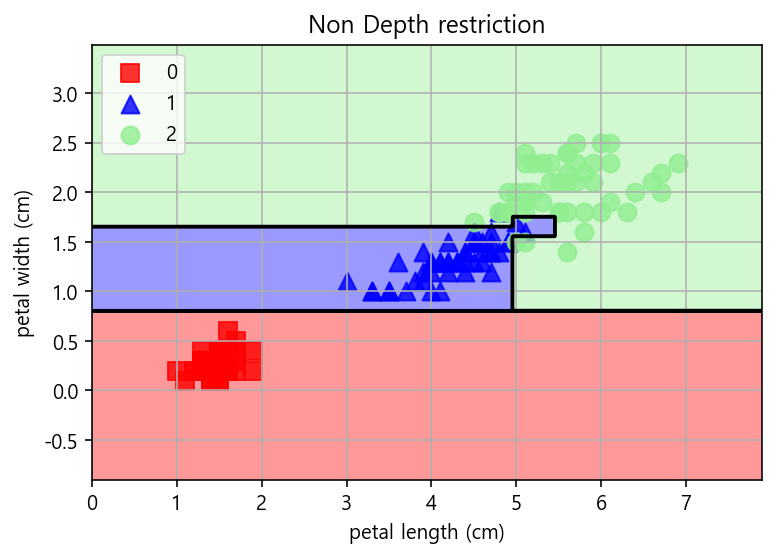

In [101]:
plot_decision_regions(X, y, tree4, "Non Depth restriction")
plt.grid()
plt.show()

# 교차검증

In [102]:
# IRIS 데이터 로드

from sklearn.datasets import load_iris

iris = load_iris()
X1 = iris.data
y1 = iris.target
X1 = X1[:, :2]

# Decision Tree 모델 생성
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier(max_depth=3).fit(X1, y1)
y1_pred = model1.predict(X1)

# acc를 metric으로 성능평가
from sklearn.metrics import accuracy_score

accuracy_score(y1, y1_pred)

0.8133333333333334

In [112]:
# 5Fold로 교차검증시 평균 성능

from sklearn.model_selection import cross_val_score

cross_val_score(model1, X1, y1, scoring="accuracy", cv=5).mean()

0.7133333333333334

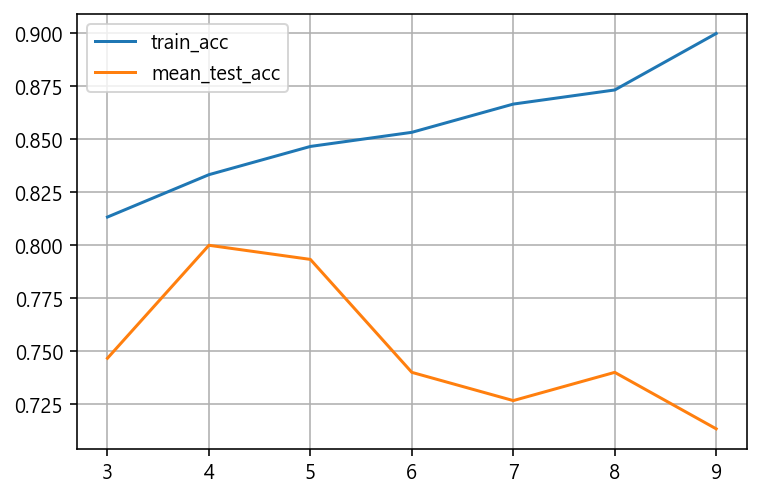

In [113]:
# 과적합 구간 확인

mean_test_accuracy = []
train_accuracy = []
for max_depth in np.arange(3, 10):
    model1 = DecisionTreeClassifier(max_depth=max_depth).fit(X1, y1)
    train_accuracy.append(accuracy_score(y1, model1.predict(X1)))
    mean_test_accuracy.append(cross_val_score(model1, X1, y1, scoring="accuracy", cv=5).mean())
    
    
plt.plot(np.arange(3, 10), train_accuracy, label='train_acc')
plt.plot(np.arange(3, 10), mean_test_accuracy, label='mean_test_acc')
plt.grid()
plt.legend()
plt.show()

## 회귀트리

회귀 트리는 예측값을 다음과 같이 각 특징값 영역마다 고정된 값을 이용해 분류모형으로 회귀 문제를 푸는 방법이다.

$$\begin{split} 
\hat{y} = 
\begin{cases} 
y_1 & \text{ if } x \geq x_{\text{threshold}} \\ 
y_2 & \text{ if } x < x_{\text{threshold}}
\end{cases} \end{split}$$

이렇게 기준값과 $y_1, y_2$를 선택하는 목적함수로 오차제곱합을 사용하면 회귀분석이 가능해진다.

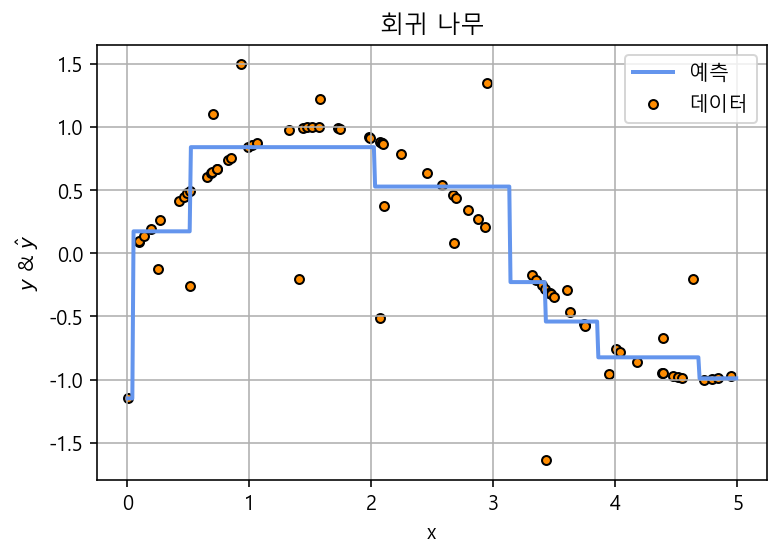

In [115]:
from sklearn.tree import DecisionTreeRegressor

rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

regtree = DecisionTreeRegressor(max_depth=3)
regtree.fit(X, y)

X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_hat = regtree.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="데이터")
plt.plot(X_test, y_hat, color="cornflowerblue", linewidth=2, label="예측")
plt.xlabel("x")
plt.ylabel(r"$y$ & $\hat{y}$")
plt.title("회귀 나무")
plt.legend()
plt.grid()
plt.show()